<a href="https://colab.research.google.com/github/gautam-pai/Brain-Tumor-Classification/blob/main/Model%20%26%20Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir='/content/drive/MyDrive/Dataset/Training'

In [ ]:
data_dir

'/content/drive/MyDrive/Dataset/Training'

## Import Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from torchvision import transforms,datasets

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
from torchvision.io import read_image

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import os

dataset_path = "/content/drive/MyDrive/Dataset/Training"  # Adjust if necessary

if os.path.exists(dataset_path):
    print("✅ Directory exists!")
    print("Contents:", os.listdir(dataset_path))  # List its contents
else:
    print("❌ Directory does NOT exist. Check the path!")


✅ Directory exists!
Contents: ['pituitary_tumor', 'meningioma_tumor', 'no_tumor', 'glioma_tumor']


## Load the image folders to dataset

In [ ]:
labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [ ]:
transform = transforms.Compose([
    transforms.Resize((512)),
    transforms.CenterCrop(512),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [ ]:
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

In [ ]:
dataset

Dataset ImageFolder
    Number of datapoints: 2870
    Root location: /content/drive/MyDrive/Dataset/Training
    StandardTransform
Transform: Compose(
               Resize(size=512, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(512, 512))
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [ ]:
test_dataset=datasets.ImageFolder(root='/content/drive/MyDrive/Dataset/Testing', transform=transform)
test_dataset

Dataset ImageFolder
    Number of datapoints: 394
    Root location: /content/drive/MyDrive/Dataset/Testing
    StandardTransform
Transform: Compose(
               Resize(size=512, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(512, 512))
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

## Visualize the image

torch.Size([3, 512, 512])


Text(0.5, 1.0, 'Gliomma Tumor')

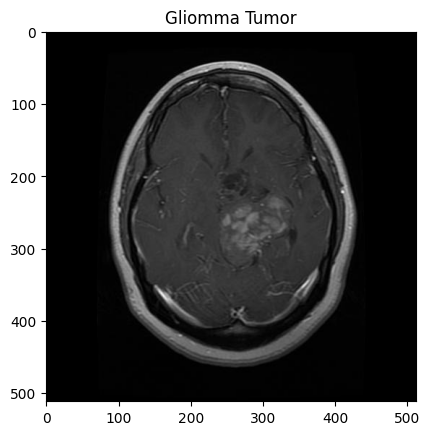

In [ ]:

print(read_image('/content/drive/MyDrive/Dataset/Training/glioma_tumor/gg (1).jpg').shape)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/glioma_tumor/gg (1).jpg').permute(1,2,0))
plt.title("Gliomma Tumor")

torch.Size([3, 512, 512])


Text(0.5, 1.0, 'Meningioma Tumor')

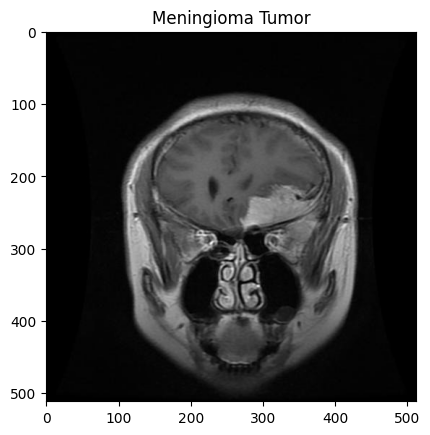

In [ ]:
print(read_image('/content/drive/MyDrive/Dataset/Training/meningioma_tumor/m (10).jpg').shape)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/meningioma_tumor/m (10).jpg').permute(1,2,0))
plt.title("Meningioma Tumor")

torch.Size([3, 350, 350])


Text(0.5, 1.0, 'No Tumor')

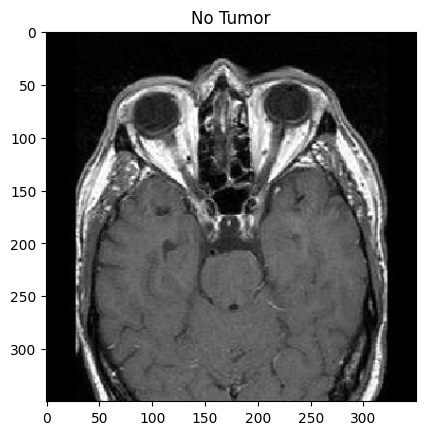

In [ ]:
print(read_image('/content/drive/MyDrive/Dataset/Training/no_tumor/1.jpg').shape)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/no_tumor/1.jpg').permute(1,2,0))
plt.title("No Tumor")

torch.Size([3, 512, 512])


Text(0.5, 1.0, 'Pituitary Tumor')

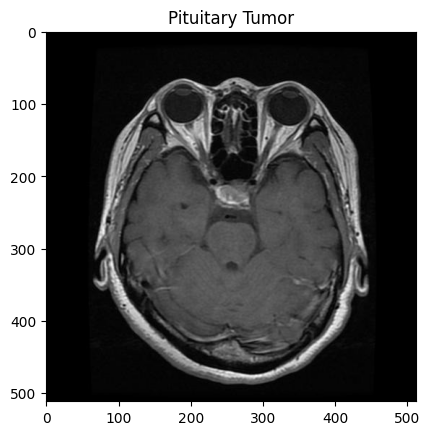

In [ ]:
print(read_image('/content/drive/MyDrive/Dataset/Training/pituitary_tumor/p (1).jpg').shape)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/pituitary_tumor/p (1).jpg').permute(1,2,0))
plt.title("Pituitary Tumor")

Text(0.5, 1.0, 'Pituitary Tumor')

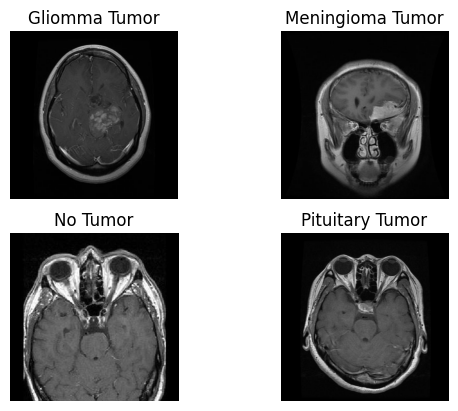

In [ ]:
plt.subplot(2,2,1)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/glioma_tumor/gg (1).jpg').permute(1,2,0))
plt.axis('off')
plt.title("Gliomma Tumor")

plt.subplot(2,2,2)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/meningioma_tumor/m (10).jpg').permute(1,2,0))
plt.axis('off')
plt.title("Meningioma Tumor")

plt.subplot(2,2,3)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/no_tumor/1.jpg').permute(1,2,0))
plt.axis('off')
plt.title("No Tumor")

plt.subplot(2,2,4)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/pituitary_tumor/p (1).jpg').permute(1,2,0))
plt.axis('off')
plt.title("Pituitary Tumor")

## Passing the Dataset to DataLoader


In [ ]:
train_dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=4,pin_memory=True)
test_dataloader=DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=4,pin_memory=True)

In [ ]:
# Get one batch of images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# Print batch shape
print("Image batch shape:", images.shape)  # Expected: (batch_size, channels, height, width)
print("Label batch shape:", labels.shape)  # Expected: (batch_size,)
print("Classes:", dataset.classes)  # Class names


Image batch shape: torch.Size([1, 3, 512, 512])
Label batch shape: torch.Size([1])
Classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


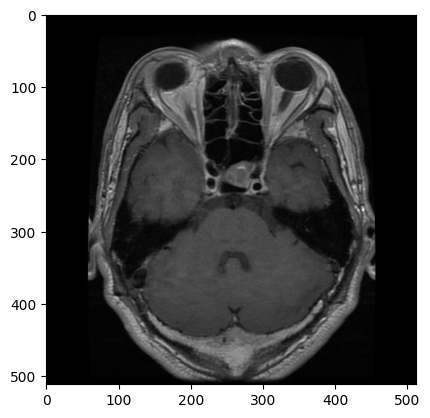

Label: pituitary_tumor


In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show first image in the batch
imshow(images[0])
print("Label:", dataset.classes[labels[0].item()])

In [ ]:
images.shape

torch.Size([1, 3, 512, 512])

## Defining the CNN Model


Image size is 3x512x512

In [ ]:
class CNN_Model(nn.Module):

  def __init__(self):
    super().__init__()
      #Convolution Filter
    self.conv1=nn.Conv2d(in_channels=3,out_channels=96,kernel_size=11,stride=4)
    self.conv2=nn.Conv2d(in_channels=96,out_channels=256,kernel_size=5,stride=1)
    self.conv3=nn.Conv2d(in_channels=256,out_channels=384,kernel_size=3,stride=1)
    self.conv4=nn.Conv2d(in_channels=384,out_channels=384,kernel_size=3,stride=1)
    self.conv5=nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3,stride=1)
    # Max Pooling Filter
    self.maxpool1=nn.MaxPool2d(kernel_size=3,stride=2)

    #Fully Connected Layer -
    self.fc1=nn.Linear(in_features=10*10*256,out_features=9216)
    self.fc2=nn.Linear(in_features=9216,out_features=4096)
    self.fc3=nn.Linear(in_features=4096,out_features=4096)
    self.fc4=nn.Linear(in_features=4096,out_features=1000)
    self.fc5=nn.Linear(in_features=1000,out_features=4)


  def forward(self,X):
    # Conv & Max Pool
    X=F.relu(self.conv1(X))
    X=self.maxpool1(X)
    # Conv & Max Pool
    X=F.relu(self.conv2(X))
    X=self.maxpool1(X)
    # 2 Conv Filter followed by Max Pooll
    X=F.relu(self.conv3(X))
    X=F.relu(self.conv4(X))
    X=F.relu(self.conv5(X))
    X=self.maxpool1(X)

    # Flatten
    X=X.view(-1,10*10*256)

    # Fully Connected Layer
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=F.relu(self.fc3(X))
    X=F.relu(self.fc4(X))
    X=self.fc5(X)

    return F.log_softmax(X,dim=1)

In [ ]:
model=CNN_Model()
model = model.to(device)

In [ ]:
# Loss and Optimizer instantiation
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

# Training Model

# **Adam Optimizer**

## Batch Size = 1

In [ ]:
import time
start_time=time.time()

epochs=20
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]

# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)
    b+=1
    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_losses.append(loss)
  train_correct.append(trn_corr)
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:1.1546881198883057
Epoch: 2  Loss:1.2261513471603394
Epoch: 3  Loss:1.3223929405212402
Epoch: 4  Loss:1.158334493637085
Epoch: 5  Loss:1.3132623434066772
Epoch: 6  Loss:1.3150078058242798
Epoch: 7  Loss:1.2432934045791626
Epoch: 8  Loss:1.2079966068267822
Epoch: 9  Loss:2.043304443359375
Epoch: 10  Loss:1.2022411823272705
Epoch: 11  Loss:1.27897310256958
Epoch: 12  Loss:1.332983374595642
Epoch: 13  Loss:2.070650815963745
Epoch: 14  Loss:1.1719789505004883
Epoch: 15  Loss:1.1419055461883545
Epoch: 16  Loss:1.1283382177352905
Epoch: 17  Loss:1.0770149230957031
Epoch: 18  Loss:1.3421950340270996
Epoch: 19  Loss:1.3541845083236694
Epoch: 20  Loss:1.3068193197250366
Total time taken to finish the training =24.99mins


## Batch Size = 32

In [ ]:
train_dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2,pin_memory=True)


In [ ]:
import time
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=20
train_losses_32=[]
test_losses_32=[]
train_correct_32=[]
test_correct_32=[]

# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
  train_losses_32.append(loss)
  train_correct_32.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses_32.append(loss)
  test_correct_32.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:1.3894649744033813
Epoch: 2  Loss:1.3857812881469727
Epoch: 3  Loss:1.3819469213485718
Epoch: 4  Loss:1.3857299089431763
Epoch: 5  Loss:1.385379672050476
Epoch: 6  Loss:1.3840796947479248
Epoch: 7  Loss:1.3855013847351074
Epoch: 8  Loss:1.384177327156067
Epoch: 9  Loss:1.385680079460144
Epoch: 10  Loss:1.3877058029174805
Epoch: 11  Loss:1.3867170810699463
Epoch: 12  Loss:1.3848729133605957
Epoch: 13  Loss:1.3877043724060059
Epoch: 14  Loss:1.3852051496505737
Epoch: 15  Loss:1.388813853263855
Epoch: 16  Loss:1.3834989070892334
Epoch: 17  Loss:1.3854899406433105
Epoch: 18  Loss:1.3844904899597168
Epoch: 19  Loss:1.3877140283584595
Epoch: 20  Loss:1.3869982957839966
Total time taken to finish the training =6.65mins


## Batch Size = 64

In [ ]:
train_dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2,pin_memory=True)

In [ ]:
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=20
train_losses_64=[]
test_losses_64=[]
train_correct_64=[]
test_correct_64=[]

# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
  train_losses_64.append(loss)
  train_correct_64.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses_64.append(loss)
  test_correct_64.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:1.3895379304885864
Epoch: 2  Loss:1.3921287059783936
Epoch: 3  Loss:1.3872456550598145
Epoch: 4  Loss:1.3883360624313354
Epoch: 5  Loss:1.3888285160064697
Epoch: 6  Loss:1.3856977224349976
Epoch: 7  Loss:1.3923085927963257
Epoch: 8  Loss:1.384398341178894
Epoch: 9  Loss:1.3899873495101929
Epoch: 10  Loss:1.3912467956542969
Epoch: 11  Loss:1.3852654695510864
Epoch: 12  Loss:1.3833636045455933
Epoch: 13  Loss:1.388412356376648
Epoch: 14  Loss:1.391655683517456
Epoch: 15  Loss:1.3867100477218628
Epoch: 16  Loss:1.388726830482483
Epoch: 17  Loss:1.3849886655807495
Epoch: 18  Loss:1.3881616592407227
Epoch: 19  Loss:1.3926377296447754
Epoch: 20  Loss:1.389543890953064
Total time taken to finish the training =6.57mins


## Storing the values

In [ ]:
train_losses_cpu = [loss.cpu().detach().numpy() for loss in train_losses]
test_losses_cpu = [loss.cpu().detach().numpy() for loss in test_losses]

train_correct_cpu = [loss.cpu().detach().numpy() for loss in train_correct]
test_correct_cpu = [loss.cpu().detach().numpy() for loss in test_correct]

train_losses_cpu_32 = [loss.cpu().detach().numpy() for loss in train_losses_32]
test_losses_cpu_32 = [loss.cpu().detach().numpy() for loss in test_losses_32]

train_correct_cpu_32 = [loss.cpu().detach().numpy() for loss in train_correct_32]
test_correct_cpu_32 = [loss.cpu().detach().numpy() for loss in test_correct_32]

train_losses_cpu_64 = [loss.cpu().detach().numpy() for loss in train_losses_64]
test_losses_cpu_64 = [loss.cpu().detach().numpy() for loss in test_losses_64]

train_correct_cpu_64 = [loss.cpu().detach().numpy() for loss in train_correct_64]
test_correct_cpu_64 = [loss.cpu().detach().numpy() for loss in test_correct_64]

In [ ]:
## Store the data
Adam_Losses=pd.DataFrame({'Training Loss-1':train_losses_cpu,'Testing Loss-1':test_losses_cpu,
                      'Training Loss-32':train_losses_cpu_32,'Testing Loss-32':test_losses_cpu_32,
                      'Training Loss-64':train_losses_cpu_64,'Testing Loss-64':test_losses_cpu_64})
Adam_Accuaracy=pd.DataFrame({'Training Loss-1':train_correct_cpu,'Testing Loss-1':test_correct_cpu,
                      'Training Loss-32':train_correct_cpu_32,'Testing Loss-32':test_correct_cpu_32,
                      'Training Loss-64':train_correct_cpu_64,'Testing Loss-64':test_correct_cpu_64})

Adam_Losses.to_csv('/content/drive/MyDrive/Dataset/Adam_Losses.csv')
Adam_Accuaracy.to_csv('/content/drive/MyDrive/Dataset/Adam_Accuaracy.csv')

# Visualization


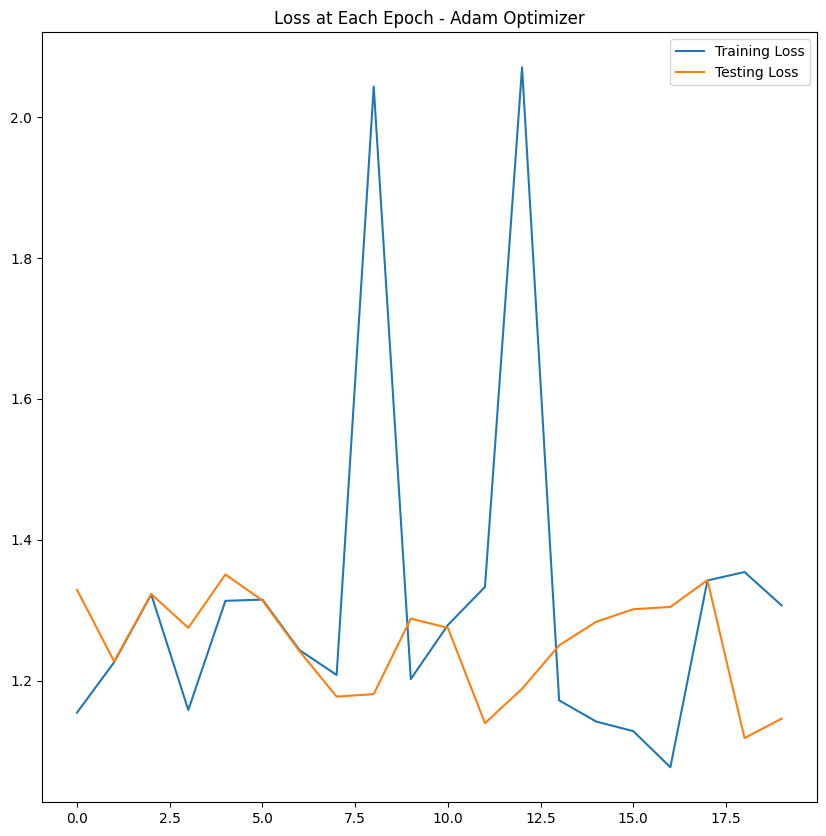

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu, label="Training Loss")
plt.plot(test_losses_cpu, label="Testing Loss")
plt.title("Loss at Each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 1 Adam.png")
plt.show()


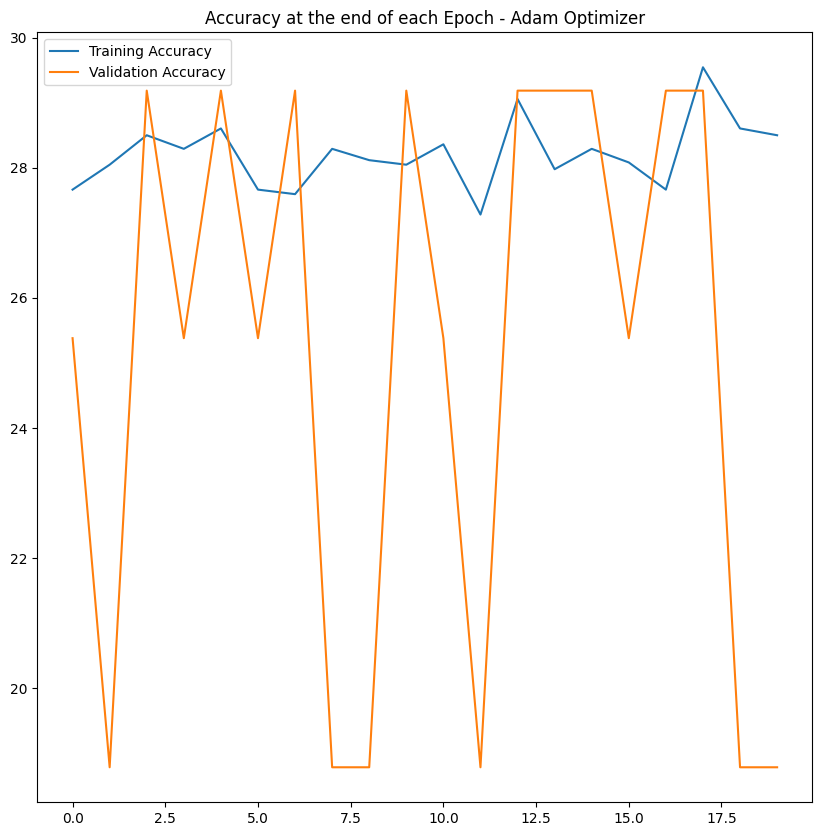

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot([(t/len(dataset))*100 for t in train_correct_cpu],label="Training Accuracy")
plt.plot([(t/len(test_dataset))*100 for t in test_correct_cpu],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 1 Adam.png")
plt.show()

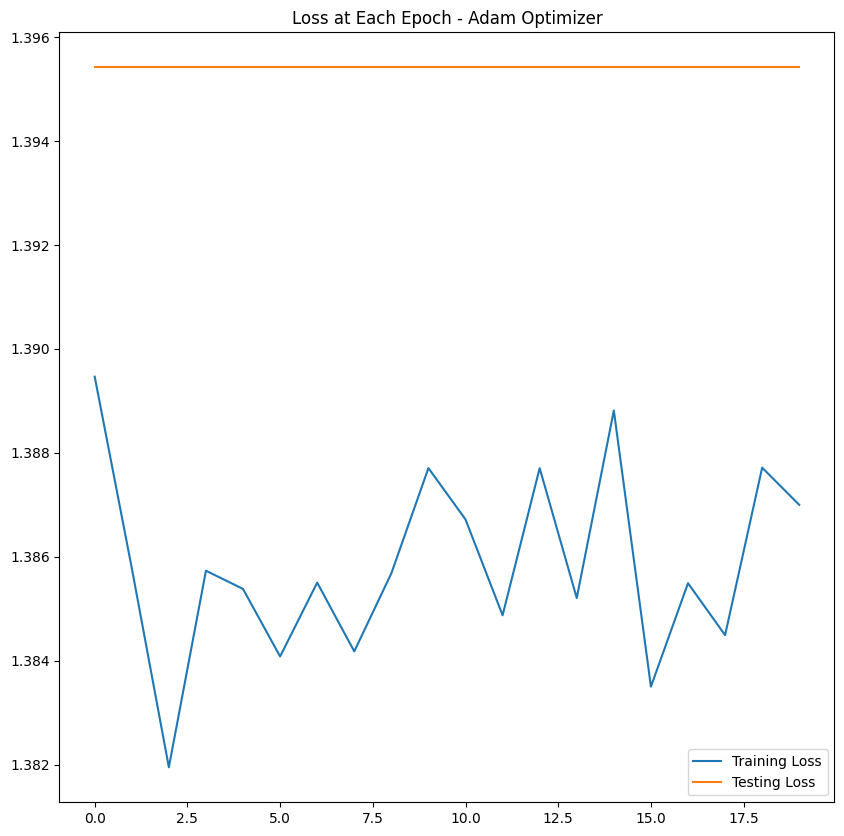

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu_32, label="Training Loss")
plt.plot(test_losses_cpu_32, label="Testing Loss")
plt.title("Loss at Each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 32 Adam.png")
plt.show()

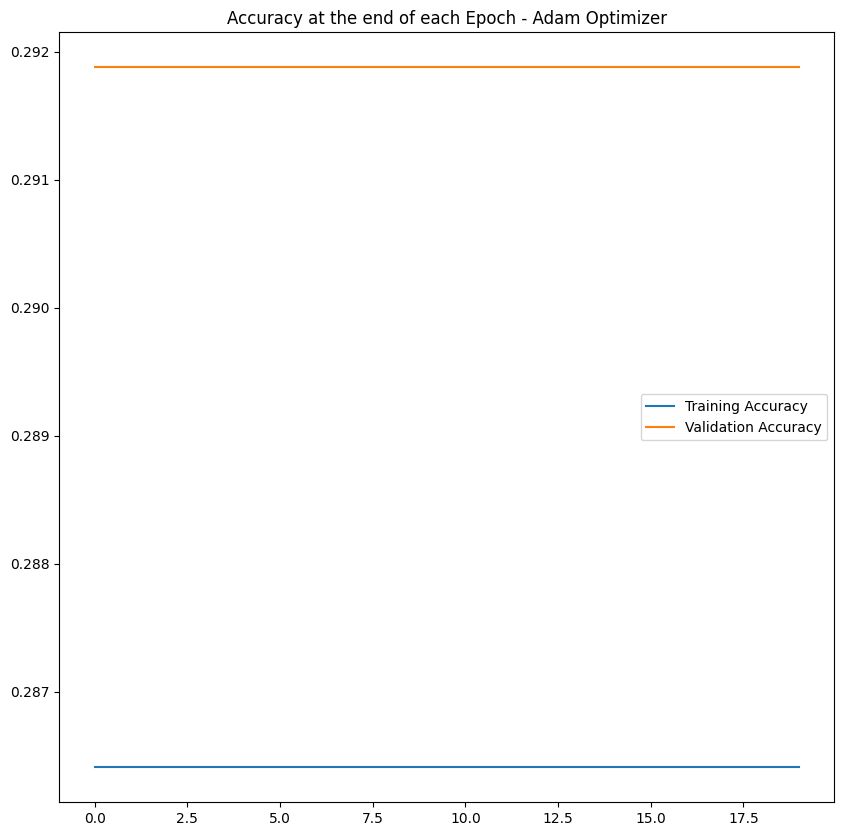

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot([t/len(dataset) for t in train_correct_cpu_32],label="Training Accuracy")
plt.plot([t/len(test_dataset) for t in test_correct_cpu_32],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 32 Adam.png")
plt.show()

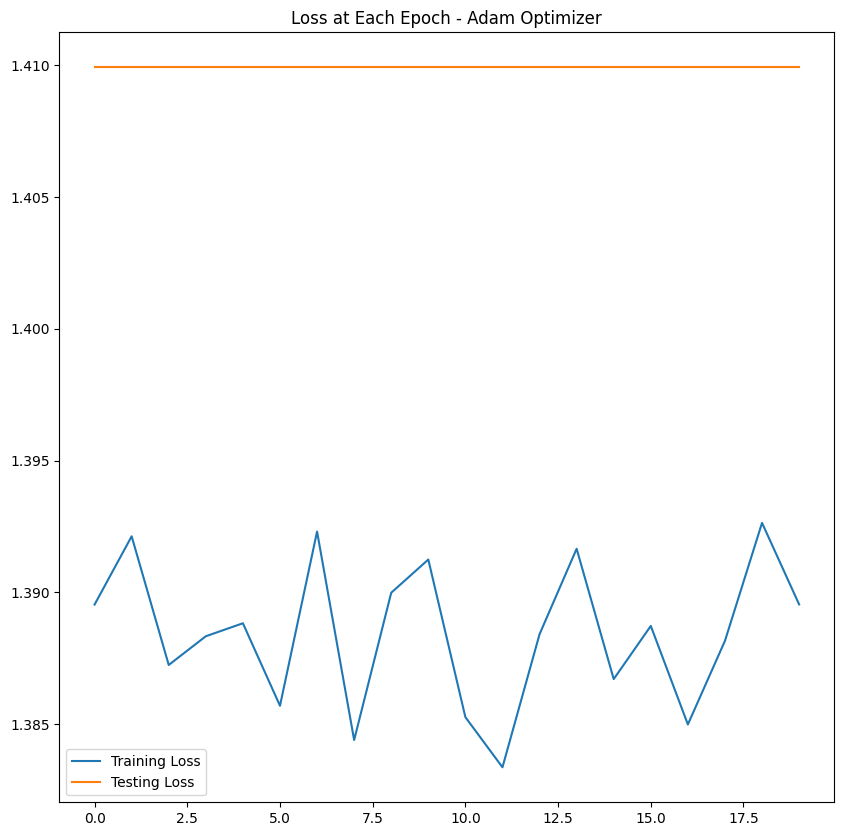

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu_64, label="Training Loss")
plt.plot(test_losses_cpu_64, label="Testing Loss")
plt.title("Loss at Each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 64 Adam.png")
plt.show()

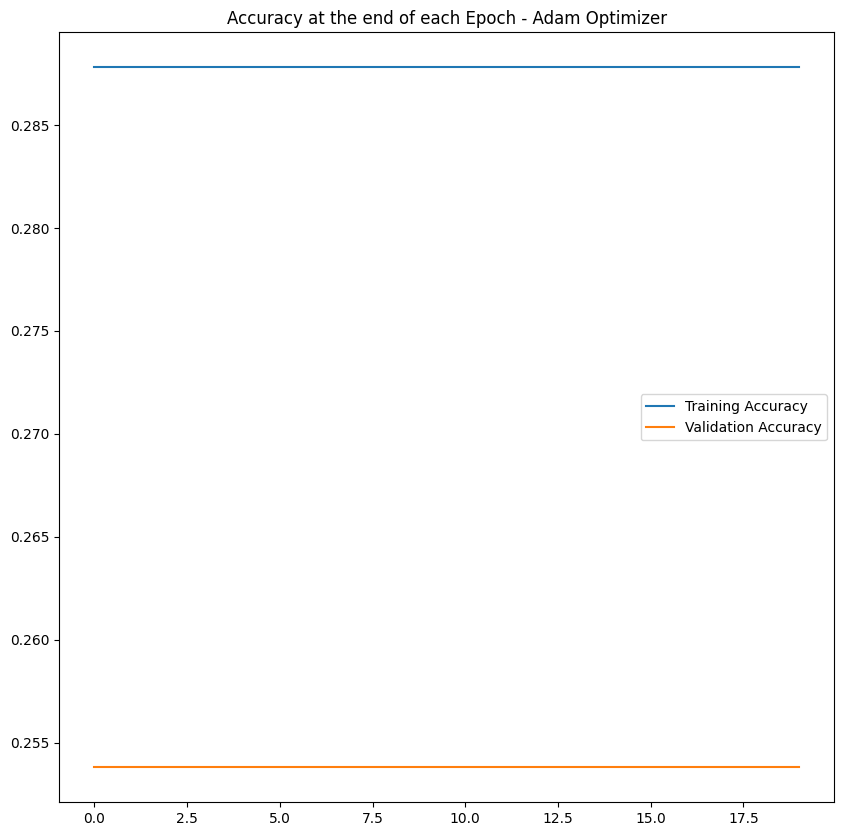

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot([t/len(dataset) for t in train_correct_cpu_64],label="Training Accuracy")
plt.plot([t/len(test_dataset) for t in test_correct_cpu_64],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 64 Adam.png")
plt.show()

# **Stochastic Gradient Descent**


## Batch Size = 1

In [ ]:
train_dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=2,pin_memory=True)

In [ ]:
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=20
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
  train_losses.append(loss)
  train_correct.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:1.134542465209961
Epoch: 2  Loss:1.3259479999542236
Epoch: 3  Loss:1.3465300798416138
Epoch: 4  Loss:1.501505970954895
Epoch: 5  Loss:1.0330924987792969
Epoch: 6  Loss:1.3200013637542725
Epoch: 7  Loss:1.342008352279663
Epoch: 8  Loss:1.2468661069869995
Epoch: 9  Loss:1.377558946609497
Epoch: 10  Loss:1.2653779983520508
Epoch: 11  Loss:1.439568042755127
Epoch: 12  Loss:0.97129225730896
Epoch: 13  Loss:1.2446436882019043
Epoch: 14  Loss:1.5866104364395142
Epoch: 15  Loss:1.094504952430725
Epoch: 16  Loss:1.3568248748779297
Epoch: 17  Loss:1.175100564956665
Epoch: 18  Loss:1.3503315448760986
Epoch: 19  Loss:1.2774332761764526
Epoch: 20  Loss:1.2199716567993164
Total time taken to finish the training =13.19mins


## Batch Size = 32

In [ ]:
train_dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2,pin_memory=True)

In [ ]:
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=20
train_losses_32=[]
test_losses_32=[]
train_correct_32=[]
test_correct_32=[]
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
  train_losses_32.append(loss)
  train_correct_32.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses_32.append(loss)
  test_correct_32.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:1.316542148590088
Epoch: 2  Loss:1.5174399614334106
Epoch: 3  Loss:1.3854225873947144
Epoch: 4  Loss:1.314898133277893
Epoch: 5  Loss:1.4151108264923096
Epoch: 6  Loss:1.3520839214324951
Epoch: 7  Loss:0.8290582895278931
Epoch: 8  Loss:1.0203115940093994
Epoch: 9  Loss:0.7392140030860901
Epoch: 10  Loss:0.8557970523834229
Epoch: 11  Loss:0.5313358306884766
Epoch: 12  Loss:0.59284508228302
Epoch: 13  Loss:0.20301255583763123
Epoch: 14  Loss:0.22109417617321014
Epoch: 15  Loss:0.40579262375831604
Epoch: 16  Loss:0.155124694108963
Epoch: 17  Loss:0.194954976439476
Epoch: 18  Loss:0.15362435579299927
Epoch: 19  Loss:0.12192308157682419
Epoch: 20  Loss:0.06132131442427635
Total time taken to finish the training =6.54mins


## Batch Size = 64

In [ ]:
train_dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2,pin_memory=True)

In [ ]:
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=20
train_losses_64=[]
test_losses_64=[]
train_correct_64=[]
test_correct_64=[]
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
  train_losses_64.append(loss)
  train_correct_64.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses_64.append(loss)
  test_correct_64.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:1.2854628562927246
Epoch: 2  Loss:1.3502496480941772
Epoch: 3  Loss:1.3484658002853394
Epoch: 4  Loss:1.3355865478515625
Epoch: 5  Loss:1.3340016603469849
Epoch: 6  Loss:1.1345198154449463
Epoch: 7  Loss:0.528045117855072
Epoch: 8  Loss:0.9745854735374451
Epoch: 9  Loss:0.4485780596733093
Epoch: 10  Loss:1.2565916776657104
Epoch: 11  Loss:0.4094615876674652
Epoch: 12  Loss:0.2880374491214752
Epoch: 13  Loss:0.2475430965423584
Epoch: 14  Loss:0.5037490129470825
Epoch: 15  Loss:0.16253192722797394
Epoch: 16  Loss:0.10763247311115265
Epoch: 17  Loss:0.21177402138710022
Epoch: 18  Loss:0.16482987999916077
Epoch: 19  Loss:0.12589451670646667
Epoch: 20  Loss:0.28257739543914795
Total time taken to finish the training =6.54mins


## Storing the values


In [ ]:
train_losses_cpu = [loss.cpu().detach().numpy() for loss in train_losses]
test_losses_cpu = [loss.cpu().detach().numpy() for loss in test_losses]

train_correct_cpu = [correct.cpu().detach().numpy() for correct in train_correct]
test_correct_cpu = [correct.cpu().detach().numpy() for correct in test_correct]

train_losses_cpu_32 = [loss.cpu().detach().numpy() for loss in train_losses_32]
test_losses_cpu_32 = [loss.cpu().detach().numpy() for loss in test_losses_32]

train_correct_cpu_32 = [correct.cpu().detach().numpy() for correct in train_correct_32]
test_correct_cpu_32 = [correct.cpu().detach().numpy() for correct in test_correct_32]

train_losses_cpu_64 = [loss.cpu().detach().numpy() for loss in train_losses_64]
test_losses_cpu_64 = [loss.cpu().detach().numpy() for loss in test_losses_64]

train_correct_cpu_64 = [correct.cpu().detach().numpy() for correct in train_correct_64]
test_correct_cpu_64 = [correct.cpu().detach().numpy() for correct in test_correct_64]

In [ ]:
## Store the data
SGD_Losses=pd.DataFrame({'Training Loss-1':train_losses_cpu,'Testing Loss-1':test_losses_cpu,
                      'Training Loss-32':train_losses_cpu_32,'Testing Loss-32':test_losses_cpu_32,
                      'Training Loss-64':train_losses_cpu_64,'Testing Loss-64':test_losses_cpu_64})
SGD_Accuaracy=pd.DataFrame({'Training Accuracy-1':train_correct_cpu,'Testing Accuracy-1':test_correct_cpu,
                      'Training Accuracy-32':train_correct_cpu_32,'Testing Accuracy-32':test_correct_cpu_32,
                      'Training Accuracy-64':train_correct_cpu_64,'Testing Accuracy-64':test_correct_cpu_64})

SGD_Losses.to_csv('/content/drive/MyDrive/Dataset/SGD_Losses.csv')
SGD_Accuaracy.to_csv('/content/drive/MyDrive/Dataset/SGD_Accuaracy.csv')

# Visualization

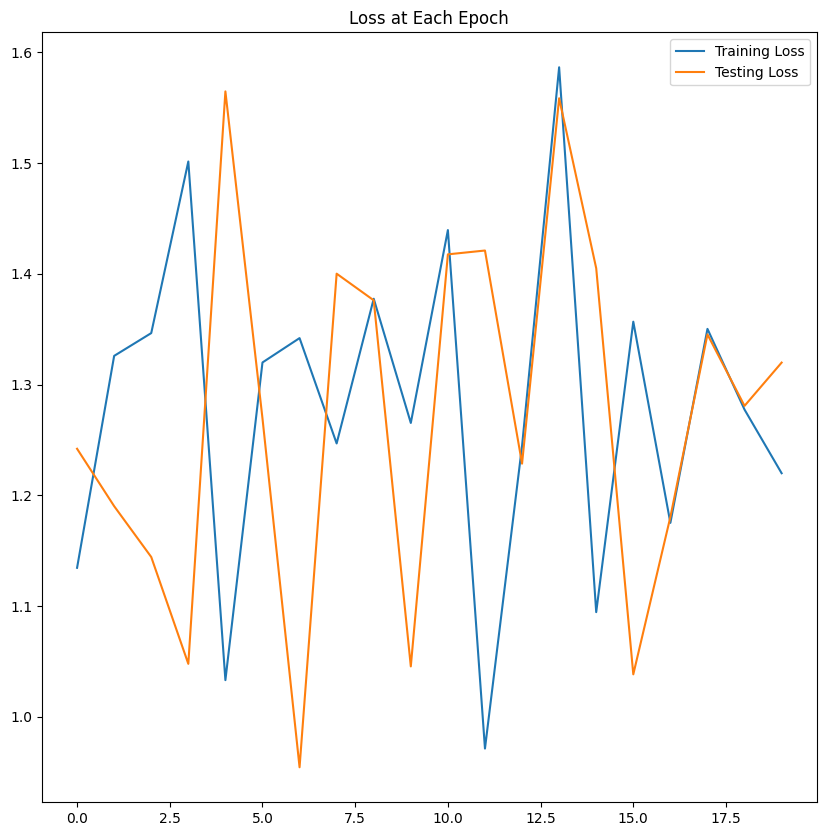

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu, label="Training Loss")
plt.plot(test_losses_cpu, label="Testing Loss")
plt.title("Loss at Each Epoch")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 1 SGD.png")
plt.show()

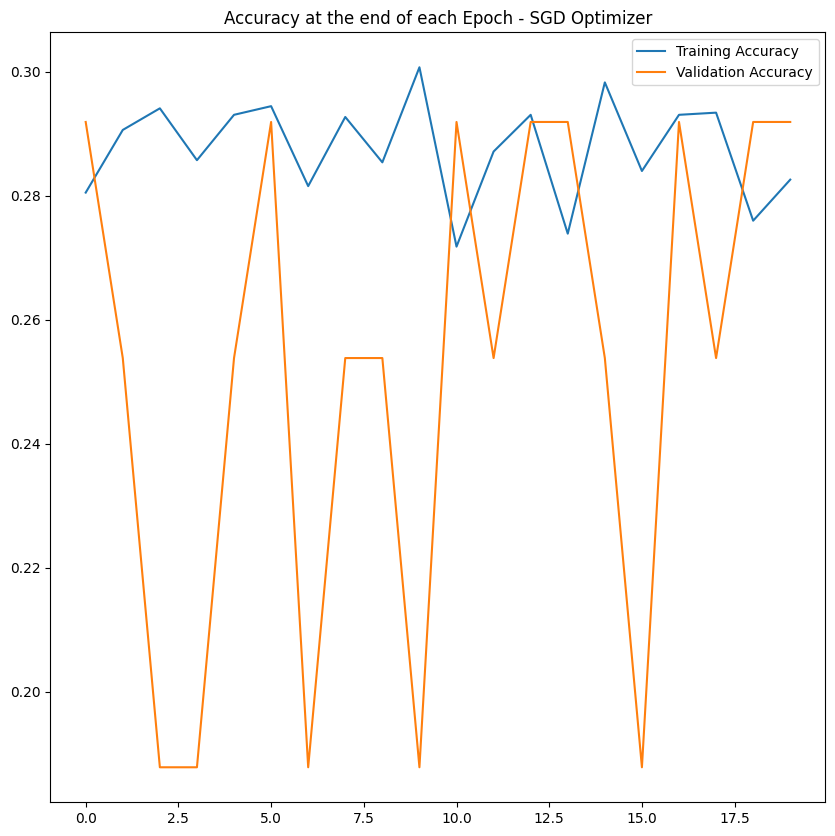

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot([t/len(dataset) for t in train_correct_cpu],label="Training Accuracy")
plt.plot([t/len(test_dataset) for t in test_correct_cpu],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - SGD Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 1 SGD.png")
plt.show()

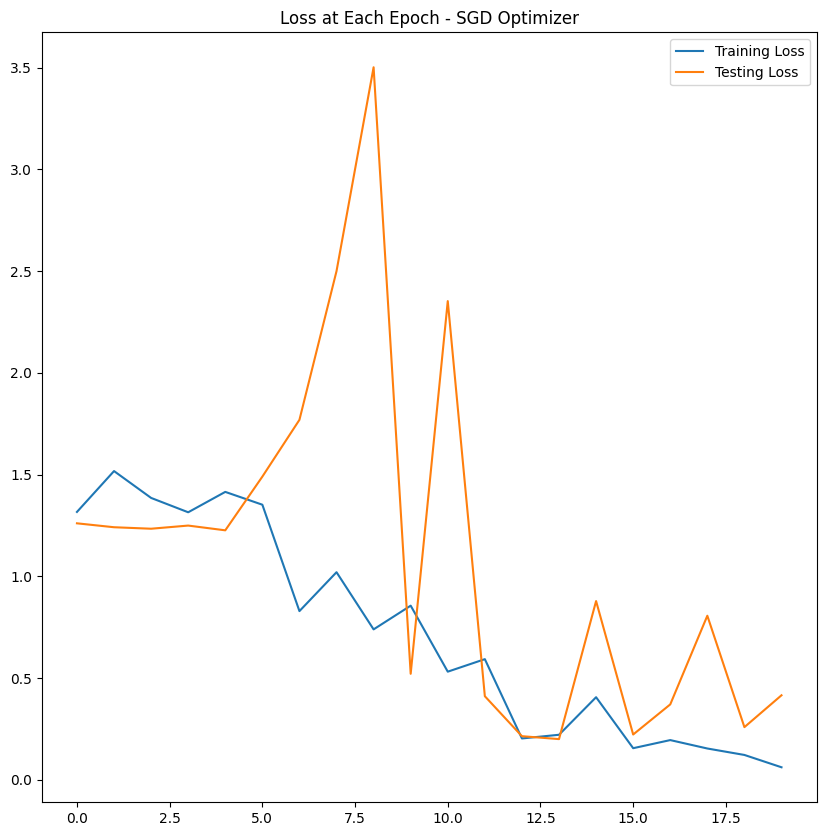

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu_32, label="Training Loss")
plt.plot(test_losses_cpu_32, label="Testing Loss")
plt.title("Loss at Each Epoch - SGD Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 32 SGD.png")
plt.show()

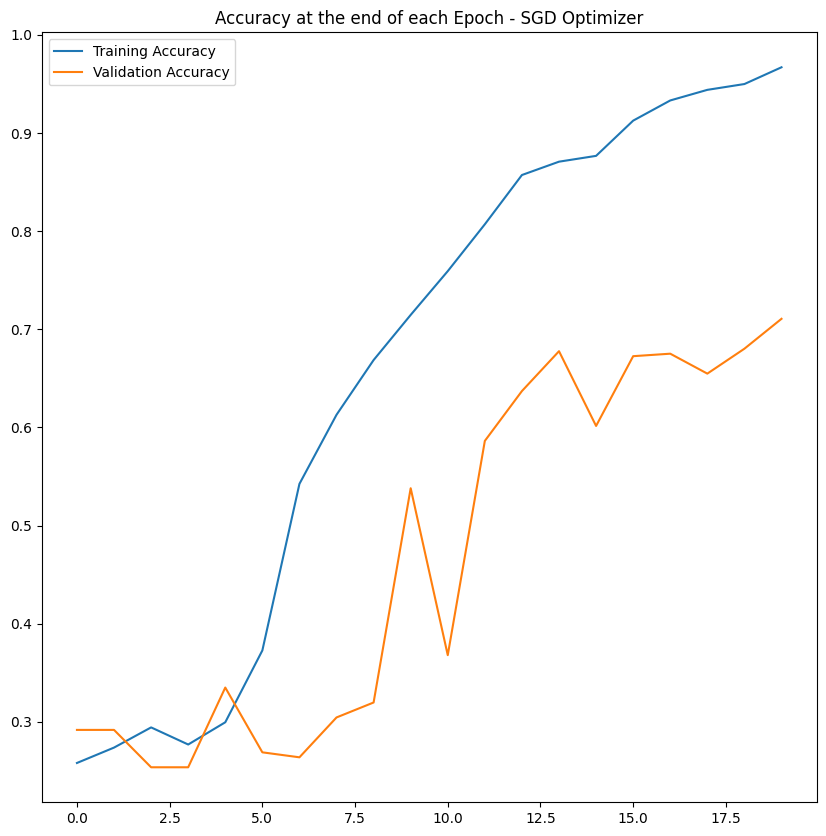

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot([t/len(dataset) for t in train_correct_cpu_32],label="Training Accuracy")
plt.plot([t/len(test_dataset) for t in test_correct_cpu_32],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - SGD Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 32 SGD.png")
plt.show()

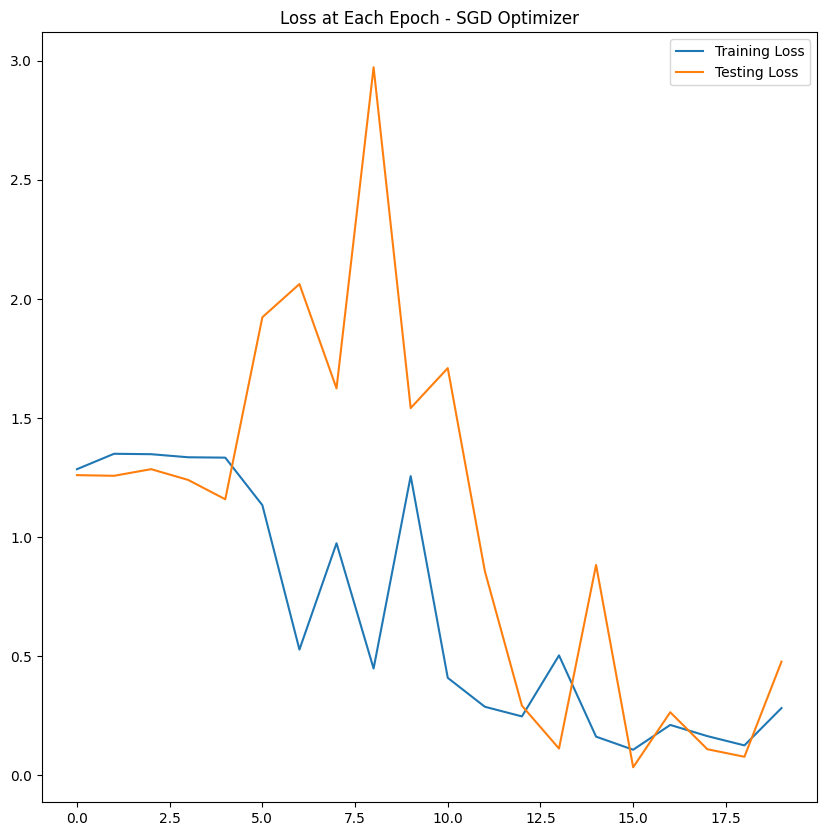

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu_64, label="Training Loss")
plt.plot(test_losses_cpu_64, label="Testing Loss")
plt.title("Loss at Each Epoch - SGD Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 64 SGD.png")
plt.show()

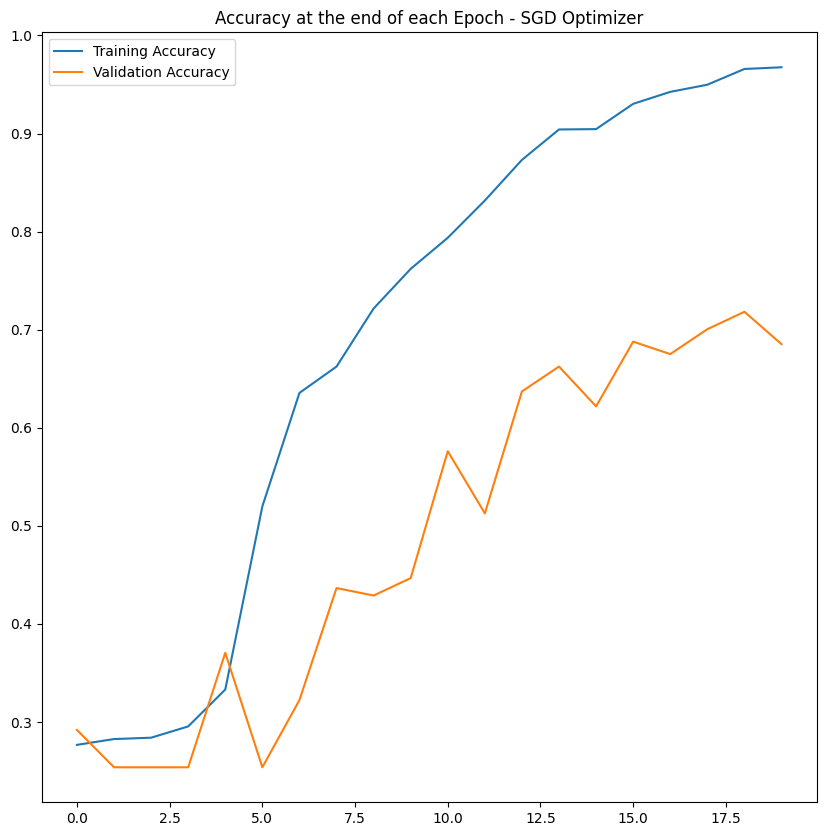

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot([t/len(dataset) for t in train_correct_cpu_64],label="Training Accuracy")
plt.plot([t/len(test_dataset) for t in test_correct_cpu_64],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - SGD Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 64 SGD.png")
plt.show()